# [手把手教你完成一个数据科学小项目（4）：评论数变化情况]()
请先阅读[“中国年轻人正带领国家走向危机”，这锅背是不背？](https://zhuanlan.zhihu.com/p/41880873)  一文，以对“手把手教你完成一个数据科学小项目”系列有个全局性的了解。

## 《踏莎行》
我知道好几个朋友按照前几篇文章的内容已经开始运行代码了，也知道一些人遇到了我碰到的 BUG，虽然更鼓励自行根据报错信息网上搜索解决方案，但也不介意加 Python
 交友娱乐会所群（QQ群：613176398，娱乐会所没有嫩模）来询问，力所能及处也会帮忙新手小白看看为何出错，可爱友善的群友也同样会帮忙的。

而如果你正被 BUG 折腾的“心力交瘁”，这里送上一首叶嘉莹先生的《踏莎行》，希望你能元气满满哈。（[如何评价叶嘉莹？ - Deserts X](https://www.zhihu.com/question/22096727/answer/128367463)）
> —世多艰，寸心如水。也曾局囿深杯里。炎天流火劫烧余，藐姑初识真仙子。
谷内青松，苍然若此。历尽冰霜偏未死。一朝鲲化欲鹏飞，天风吹动狂波起。  

![](https://upload-images.jianshu.io/upload_images/7145358-6aab3c5323698dc0.jpg?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

## 评论数变化情况
### 数据读取
但不管什么说，截至目前已经完成了[数据爬取](https://zhuanlan.zhihu.com/p/42060094)、[数据提取与IP查询](https://zhuanlan.zhihu.com/p/42151036)、[数据异常与清洗](https://www.jianshu.com/p/c03a837a91c6)，拿到手的数据终于可以用来分析和可视化了，也是件值得欣慰的事。

闲言少叙，先来看看评论数随时间的变化情况吧，虽然上一篇文章：[数据异常与清洗](https://www.jianshu.com/p/c03a837a91c6)里涉及过，但由于侧重点在数据异常，所以未做展开，现在重新扩展下。

In [1]:
import pandas as pd
df = pd.read_csv('Sina_Finance_Comments_All_20180811_Cleaned.csv',encoding='utf-8')
df.head()

,Unnamed: 0,Unnamed: 0.1,No,page,nick,time,content,area,ip,ip_loc,...,channel,hot,level,login_type,media_type,mid,stamp,time_ymd,time_mdh,cmntcount
0,0,20,21,2,我阿訇打钱,2018-08-11 17:15:13,[费解][费解][费解],青海海南藏族自治州,36.100.157.102,"青海省海南州 电信 * GeoIP: Hangzhou, Zhejiang, China *...",...,cj,0,5,0,0,5B6EA91F-24649D66-17A3D8EEA-8C5-8D1,1533978913,2018-08-11,08-11 17,3773
1,1,21,22,2,TKK_Questioning,2018-08-11 17:04:20,那你以为不单身就能避免？,安徽合肥,36.7.153.141,"安徽省合肥市 电信 * GeoIP: Hefei, Anhui, China * China...",...,cj,0,4,0,0,5B6EA690-2407998D-1343F7922-8C5-877,1533978260,2018-08-11,08-11 17,3772
2,2,22,23,2,碌碌无为的困难群众,2018-08-11 16:29:58,谢谢,山西太原,113.27.238.138,"山西省太原市 电信 * GeoIP: Xian, Shaanxi, China * Chin...",...,cj,0,0,0,0,5B6E9E84-711BEE8A-1796C1F18-8C5-90D,1533976198,2018-08-11,08-11 16,3771
3,3,23,24,2,竖纹AdaIX,2018-08-11 14:25:19,想去声援你 结果发不出🌚,广东广州,183.234.62.211,"广东省广州市 移动 * GeoIP: Guangzhou, Guangdong, China...",...,cj,0,0,0,0,5B6E814B-B7EA3ED3-72E25C17-8C5-953,1533968719,2018-08-11,08-11 14,3770
4,4,24,25,2,猫切,2018-08-11 13:02:03,锅太大，接不住,广东深圳,14.17.22.33,"广东省深圳市 电信 * GeoIP: Shenzhen, Guangdong, China ...",...,cj,0,0,0,0,5B6E6DCB-E111621-3E5F4FAE-8C5-8EE,1533963723,2018-08-11,08-11 13,3769


## 评论数变化 
### 评论数随时间戳变化情况

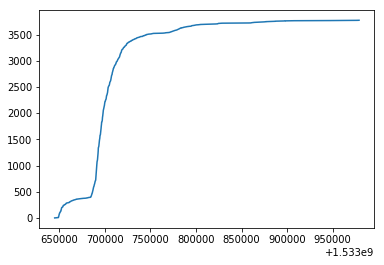

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df.stamp, df.cmntcount);

时间戳不太好识别，所以还是用常规的日期，并使用 `pyecharts` （[pyecharts 配置文档](http://pyecharts.org/#/zh-cn/charts) ）绘制每日评论数的变化折线图：
### 每日评论数变化情况
按天来看，这篇文章的大部分评论都是产生于在8月8号，即2008年北京奥运会十周年的当日，当然可能并不相关。

In [5]:
df_ymdcount = df.groupby('time_ymd')['cmntcount'].count()
from pyecharts import Line
line = Line("每日评论数变化情况")
line.add("日期", df_ymdcount.index, df_ymdcount.values,line_type='dotted')
line

### 每小时评论数
细分到每个小时上，评论的峰值发生在8号的9点，高达658条，数值大小在本文的图里看不出来，但 jupyter notebook 代码里的 pyecharts 图表都是交互式的，每个点的数值和时间均可查看。需注意的是需要运行过过代码才能看到，Github上点开是空白的。

In [6]:
df_mdhcount = df.groupby('time_mdh')['cmntcount'].count()
from pyecharts import Line
line = Line("每小时评论数")
line.add("小时", df_mdhcount.index, df_mdhcount.values,line_opacity=1,line_type='dotted')
line

看起来更为立体的每小时评论数柱形图：

该新浪财经这篇《中国年轻人正带领国家走向危机》文章，有着极其“耸人听闻”的标题，但同样逃不过“速朽”的命运，在一两天内就趋于平淡了。

In [7]:
from pyecharts import Bar
bar = Bar("每小时评论数")
bar.add("小时", df_mdhcount.index, df_mdhcount.values,is_label_show=True,xaxis_interval=0,xaxis_rotate=-90)
bar

### 组合图 overlap
[pyecharts 配置文档](http://pyecharts.org/#/zh-cn/charts) 

评论数随时间的变化情况大概就是这样了，其实没太多可说的，如果把后面提取地理位置（area 列）中的省份和城市数据，并调用百度地图API拿到所有位置的经纬度，并用BDP绘制动态热力图的实现过程先在这里一起讲的话，可能更有的可说，不过内容所限还是后续再讲哈。感兴趣的朋友可以按照这里的思路自行尝试绘制出下面的动态图哈。

<img src='https://upload-images.jianshu.io/upload_images/7145358-fe729d2d629f06c1.gif?imageMogr2/auto-orient/strip'>

In [13]:
df_mdhmax = df.groupby('time_mdh')['cmntcount'].max()
df_mdhcount = df.groupby('time_mdh')['cmntcount'].count()
from pyecharts import Bar, Line, Overlap
bar = Bar("每小时评论数")
bar.add("小时", df_mdhcount.index, df_mdhcount.values,is_label_show=True,xaxis_interval=-90,
        xaxis_rotate=-90, yaxis_interval=200,yaxis_max=800)
line = Line("每小时评论数")
line.add("小时", df_mdhmax.index, df_mdhmax.values,line_opacity=1,
         line_type='dotted', yaxis_interval=1000,yaxis_max=4000)

overlap = Overlap()
#overlap.use_theme("macarons")
overlap.add(bar)
overlap.add(line, is_add_yaxis=True, yaxis_index=1)
#overlap.render() # 使用 render() 渲染生成 .html 文件
overlap

## 唠嗑
仍值得一说的是在作图和可视化的过程中，对评论数相关图表还是不满意，于是想把每小时评论数的柱形图和总评论数变化的曲线图组合到一起，就像当初[爬取张佳玮138w+知乎关注者：数据可视化](https://zhuanlan.zhihu.com/p/28890605)完成项目时，在完全不懂 ECharts3里的代码和配置项的情况下，硬着头皮坑 JavaScript 代码，搞了个知乎第一大V“张公子”张佳玮的138万关注中自身有100+关注的人群的性别人数和比例图，今日看来，依旧兼具美感和创意，不像别处看到的可视化图一般“丑陋”（逃...）；
![](https://upload-images.jianshu.io/upload_images/7145358-55f984b545cedd8c.jpg?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

也在[简书=鸡汤？爬取简书今日看点：1916篇热门文章可视化](https://zhuanlan.zhihu.com/p/29118954)项目里绘制了简书热门文章发布时间的年月分布图，审美杠杠的（逃...）：
![](https://upload-images.jianshu.io/upload_images/7145358-67a540eca45083b7.jpg?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

当然这里不必像上述二者那样需要去啃 ECharts3 的 JavaScript 代码（相关实现：[图表太丑怎么破，ECharts神器带你飞！](http://zhuanlan.zhihu.com/p/29988515)），直接在 [pyecharts 配置文档](http://pyecharts.org/#/zh-cn/charts)  里有组合图多种示例，轻松实现下图：

便捷的代价就是配色上没有太多选择的余地：
![](https://upload-images.jianshu.io/upload_images/7145358-931331be2789506c.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

## 小结
pyecharts（ [图表详情](http://pyecharts.org/#/zh-cn/charts)） 提供的图表选择还是蛮多的，大家可以自行选择想呈现的效果。后面地图可视化也会用到。而且，用起来很简单的，套用示例，改成自己的数据就行。
![](https://upload-images.jianshu.io/upload_images/7145358-a22abc37da0d2ae5.gif?imageMogr2/auto-orient/strip)